# Data Set : mpg Data
## Description:

### Data describes different car models by their characteristics such as displacement,weight etc and their mileage is also recorded. We like to see the association between fuel efficiency (measured in miles per gallon) and the car model and make and other attributes.

## Prediciton problem :

### Given a car’s make, model and other attributes, predict the fuel efficiency.


### Data contains:

## Target: mpg

## Feature 1: Cylinders

## Feature 2: Displacement

## Feature 3: Horsepower

## Feature 4: Weight of the car

## Feature 5: Acceleration

## Feature 6: Model year

## Feature 7: Origin

## Feature 8: Car name


# Necessary Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from sklearn import linear_model
from pandas.tools.plotting import scatter_matrix
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.formula.api as ols
from sklearn import preprocessing
import plotly.plotly as py
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go
matplotlib.style.use('ggplot')
init_notebook_mode(connected=False)
import math

# Reading and Cleaning the data

In [2]:
mpg_data =  pd.read_csv('Ex04_Mpg_Regression.csv')
mpg_data = mpg_data.replace('?', np.NaN)
mpg_data.horsepower = mpg_data.horsepower.astype('float64')
mpg_data['carname'] = pd.Categorical(mpg_data.carname).codes
mpg_data = mpg_data.dropna(axis=0)
mpg_data.shape

(391, 9)

# Checking my dataset

In [3]:
print(mpg_data.dtypes)
mpg_data.describe()

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
modelyear         int64
origin            int64
carname           int16
dtype: object


mpg   cylinders  displacement  horsepower       weight  \
count  391.000000  391.000000    391.000000  391.000000   391.000000   
mean    23.459847    5.465473    194.124041  104.404092  2976.237852   
std      7.810128    1.703152    104.622462   38.518732   850.071941   
min      9.000000    3.000000     68.000000   46.000000  1613.000000   
25%     17.000000    4.000000    105.000000   75.000000  2224.500000   
50%     23.000000    4.000000    151.000000   93.000000  2800.000000   
75%     29.000000    8.000000    264.500000  125.000000  3616.500000   
max     46.600000    8.000000    455.000000  230.000000  5140.000000   

       acceleration   modelyear      origin     carname  
count    391.000000  391.000000  391.000000  391.000000  
mean      15.550384   75.994885    1.578005  148.590793  
std        2.756557    3.675975    0.806020   89.530063  
min        8.000000   70.000000    1.000000    0.000000  
25%       13.800000   73.000000    1.000000   65.500000  
50%       15.500000   76.000000    1.000000  149.000000  
75%       17.050000   79.000000    2.000000  225.500000  
max       24.800000   82.000000    3.000000  304.000000

# Scaling the data

In [4]:
names = mpg_data.columns.tolist()
for i in range(len(names)):
    mean = mpg_data[names[i]].mean()
    sd = mpg_data[names[i]].std()
    mpg_data[names[i]] = (mpg_data[names[i]] - mean)/sd
mpg_data

mpg  cylinders  displacement  horsepower    weight  acceleration  \
0   -1.083189   1.488139      1.489890    1.573154  0.843178     -1.469363   
1   -0.699073   1.488139      1.184028    1.183733  0.540851     -1.650749   
2   -0.955150   1.488139      1.050214    1.183733  0.537322     -1.287977   
3   -0.827111   1.488139      1.031097    0.924119  0.556144     -1.832134   
4   -1.083189   1.488139      2.244986    2.429880  1.605467     -2.013520   
5   -1.211228   1.488139      2.483940    3.001031  1.620759     -2.376291   
6   -1.211228   1.488139      2.350126    2.871224  1.571352     -2.557677   
7   -1.211228   1.488139      2.493499    3.130838  1.704282     -2.013520   
8   -1.083189   1.488139      1.872217    2.222189  1.027868     -2.557677   
9   -1.083189   1.488139      1.805310    1.702961  0.690250     -2.013520   
10  -1.211228   1.488139      1.394308    1.443347  0.744363     -2.739063   
11  -1.083189   1.488139      1.967799    1.183733  0.923171     -2.194906   
12  -1.211228   1.488139      2.493499    3.130838  0.129121     -2.013520   
13   0.069161  -0.860447     -0.775398   -0.244143 -0.710808     -0.199663   
14  -0.186917   0.313846      0.037047   -0.244143 -0.168501     -0.018278   
15  -0.699073   0.313846      0.046605   -0.192221 -0.237907     -0.018278   
16  -0.314956   0.313846      0.056163   -0.503757 -0.457888      0.163108   
17   0.453277  -0.860447     -0.928329   -0.425873 -0.995490     -0.381049   
18   0.325238  -0.860447     -0.928329   -1.516252 -1.342519      1.795579   
19   0.197200  -0.860447     -0.804072   -0.451835 -0.357897      0.707265   
20   0.069161  -0.860447     -0.832747   -0.373950 -0.642578     -0.381049   
21   0.197200  -0.860447     -0.861422   -0.244143 -0.707279      0.707265   
22   0.325238  -0.860447     -0.698933    0.223162 -0.873147     -1.106592   
23  -0.314956   0.313846      0.046605   -0.373950 -0.386129     -0.199663   
24  -1.723384   1.488139      1.585472    2.871224  1.927792     -0.562435   
25  -1.723384   1.488139      1.078888    2.481803  1.646640     -0.199663   
26  -1.595345   1.488139      1.184028    2.741417  1.653698     -0.743820   
27  -1.851422   1.488139      1.050214    2.300073  2.065428      1.070036   
28   0.453277  -0.860447     -0.928329   -0.425873 -0.995490     -0.381049   
29   0.581316  -0.860447     -0.517327   -0.373950 -0.837856     -0.018278   
..        ...        ...           ...         ...       ...           ...   
366  0.581316  -0.860447     -0.784956   -0.425873 -0.436713      1.469085   
367  0.453277  -0.860447     -0.784956   -0.425873 -0.395540      1.106313   
368  1.349549  -0.860447     -0.784956   -0.425873 -0.683751      0.888651   
369  0.965433  -0.860447     -0.784956   -0.503757 -0.472005      0.235662   
370  0.709355  -0.860447     -0.565118   -0.529719 -0.530823      0.163108   
371  0.453277  -0.860447     -0.412187   -0.373950 -0.283785      0.888651   
372  0.069161  -0.860447     -0.517327   -0.322028 -0.130857      0.308216   
374  1.605627  -0.860447     -0.851863   -0.789333 -1.171945     -0.090832   
375  1.733666  -0.860447     -0.985678   -0.945101 -1.119009      0.961205   
376  0.965433  -0.860447     -0.985678   -0.945101 -1.183709      0.743542   
377  1.861705  -0.860447     -0.851863   -1.074908 -1.001372     -0.308495   
378  1.605627  -0.860447     -0.918771   -0.893178 -1.001372      0.634711   
379  1.605627  -0.860447     -0.708491   -0.425873 -0.960199     -0.381049   
380  1.605627  -0.860447     -0.832747   -0.763371 -0.907262     -0.381049   
381  1.349549  -0.860447     -0.823189   -0.893178 -0.860207      0.489602   
382  1.861705  -0.860447     -0.985678   -0.971062 -1.189591     -0.199663   
383  1.093472  -0.860447     -0.985678   -0.971062 -1.189591      0.054277   
384  1.861705  -0.860447     -0.985678   -0.971062 -1.154300      0.235662   
385  0.197200   0.313846     -0.125442    0.145278 -0.036747      0.308216   
386  1.861705   0.313846      0.

# Splitting the data (90-10)

In [5]:
splitend = int(0.8 * len(mpg_data))
mpg_data_shuffled = mpg_data.sample(frac=1)
train, test = mpg_data_shuffled[:splitend], mpg_data_shuffled[splitend:]

# Finding the correlation amongst the variables

In [6]:
correlation_before_feature_selection =  mpg_data.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlation_before_feature_selection, vmin = -1, vmax = 1)
fig.colorbar(cax)
ticks = np.arange(0, len(names), 1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names)
plt.show()

# Plotting the correlation scatter matrix with each variable

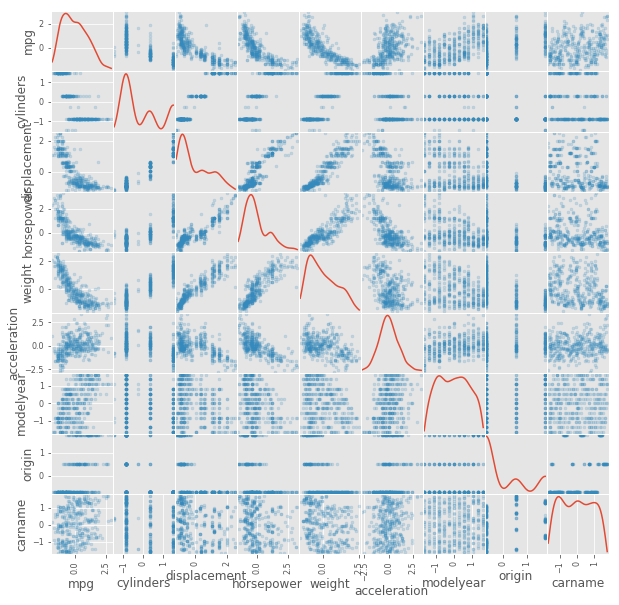

In [7]:
scatter_matrix(mpg_data, alpha=0.2, figsize=(10, 10), diagonal='kde')
plt.show()

# Splitting the data as X_train/Y_train and X_test/Y_test

In [8]:
X_train = train.iloc[:, 1:9]
Y_train = train.iloc[:, 0] 
X_test = test.iloc[:, 1:9]
Y_test = test.iloc[:, 0]

In [9]:
X_train

cylinders  displacement  horsepower    weight  acceleration  modelyear  \
369  -0.860447     -0.784956   -0.503757 -0.472005      0.235662   1.633611   
379  -0.860447     -0.708491   -0.425873 -0.960199     -0.381049   1.633611   
167  -0.860447     -0.517327   -0.555680 -0.396717      0.525879  -0.270645   
296  -0.273301     -0.106326   -0.711448  0.651430      1.650470   0.817501   
285   1.488139      1.031097    0.638544  0.880822     -0.780098   0.817501   
112   0.313846     -0.373955    0.067393 -0.593171     -0.562435  -0.814718   
321  -0.860447     -1.033469   -1.022985 -1.019017      0.852373   1.089538   
230   1.488139      1.967799    2.222189  1.586645     -1.215423   0.273428   
137   1.488139      1.184028    1.183733  1.741926     -0.743820  -0.542682   
316  -0.860447     -0.928329   -0.685487 -0.927260      0.090554   1.089538   
270  -0.860447     -0.364396    0.015471 -0.272022      0.417048   0.545465   
381  -0.860447     -0.823189   -0.893178 -0.860207      0.489602   1.633611   
305   0.313846     -0.201907    0.275085 -0.448477     -1.541917   0.817501   
66    1.488139      2.244986    2.689494  1.948967     -1.650749  -1.086755   
80   -0.860447     -0.928329   -0.322028 -0.809623      0.525879  -1.086755   
314  -0.860447     -0.412187   -0.373950  0.031482      1.650470   1.089538   
361   0.313846     -0.459978    0.404892 -0.054393     -0.634989   1.361575   
121  -0.860447     -0.698933    0.145278 -0.372013     -0.562435  -0.814718   
254  -0.860447     -0.517327   -0.425873 -0.301431     -0.054555   0.545465   
212   1.488139      1.489890    1.053926  1.269025     -1.287977   0.001391   
94    1.488139      2.493499    3.130838  2.323053     -1.650749  -0.814718   
362   0.313846      0.352467    0.145278  0.516147      0.090554   1.361575   
337  -0.860447     -0.565118   -0.529719 -0.571996      0.054277   1.361575   
371  -0.860447     -0.412187   -0.373950 -0.283785      0.888651   1.633611   
325  -0.860447     -0.995236   -1.464329 -0.754334      2.956447   1.089538   
192   0.313846      0.056163   -0.607603  0.042070      0.743542   0.001391   
376  -0.860447     -0.985678   -0.945101 -1.183709      0.743542   1.633611   
126   0.313846      0.362025   -0.114336 -0.088508      0.163108  -0.542682   
224   0.313846      0.534072    0.145278  0.639666      0.308216   0.273428   
147  -0.860447     -0.746723   -0.763371 -0.859031     -0.562435  -0.542682   
..         ...           ...         ...       ...           ...        ...   
124   0.313846      0.037047   -0.244143  0.147943      0.344494  -0.542682   
7     1.488139      2.493499    3.130838  1.704282     -2.013520  -1.630828   
331  -0.860447     -1.004794   -1.100869 -1.330755     -0.090832   1.089538   
240   0.313846     -0.459978   -0.192221 -0.189676     -0.381049   0.273428   
291   1.488139      1.585472    1.183733  1.133742     -0.925206   0.817501   
213   1.488139      1.031097    0.664505  1.051396     -0.199663   0.001391   
184  -0.860447     -0.918771   -0.659526 -0.848443      0.779819   0.001391   
301  -0.860447     -0.851863   -0.893178 -0.971962     -0.235941   0.817501   
385   0.313846     -0.125442    0.145278 -0.036747      0.308216   1.633611   
143  -0.860447     -1.129050   -1.360483 -1.561324      0.344494  -0.542682   
93    1.488139      2.350126    2.871224  2.068957     -1.650749  -0.814718   
106   0.313846      0.362025   -0.114336 -0.220261     -0.199663  -0.814718   
56   -0.860447     -0.775398   -0.244143 -0.821387     -0.018278  -1.086755   
360   0.313846     -0.249698    0.301046 -0.089684     -1.070315   1.361575   
386   0.313846      0.648770   -0.503757  0.045599      0.525879   1.633611   
34    0.313846      0.534072   -0.114336  0.414979     -0.018278  -1.358792   
189   1.488139      1.499448    1.235656  1.457244     -0.997760   0.001391   
12    1.488139      2.493499    3.130838  0.129121     -2.013520  -1.630828   
256   0.313846      0.362025   -0.373950  0.274991     

# LASSO REGRESSION

# Plotting the Lasso Regression

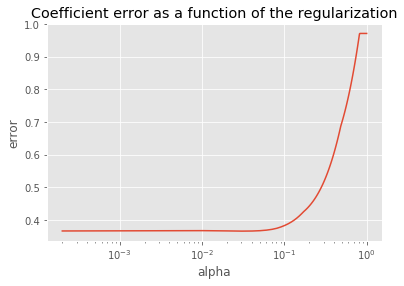

In [10]:
alpha1 =  np.linspace(0.0002, 1, 100)
lasso = linear_model.Lasso()
coefs = []
errors = []
for a1 in alpha1:
    lasso.set_params(alpha=a1)
    lasso.fit(X_train, Y_train)
    coefs.append(lasso.coef_)
    residual = lasso.predict(X_test) - Y_test
    rmse = np.sqrt(np.mean(residual ** 2))
    errors.append(rmse)
plt.subplot(111)
ax = plt.gca()
ax.plot(alpha1, errors)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('error')
plt.title('Coefficient error as a function of the regularization')
plt.axis('tight')
plt.show()

df1 = pd.DataFrame(alpha1)
df2 = pd.DataFrame(coefs)
df = df1.join(df2,how='right',lsuffix='_x')
lst = ['Alphas','cylinders','displacement','horsepower','weight','acceleration','modelyear','origin','carname']
df.columns = lst

In [11]:
trace0 = go.Scatter(
    x = df.Alphas,
    y = df.cylinders,
    name = 'Cylinders',
    line = dict(
        color = ('rgb(205, 12, 24)'),
        width = 4)
)
trace1 = go.Scatter(
    x = df.Alphas,
    y = df.displacement,
    name = 'Displacement',
    line = dict(
        color = ('rgb(22, 96, 167)'),
        width = 4)
)
trace2 = go.Scatter(
    x = df.Alphas,
    y = df.horsepower,
    name = 'Horsepower',
    line = dict(
        color = ('rgb(190, 11, 23)'),
        width = 4)
)
trace4 = go.Scatter(
    x =df.Alphas,
    y = df.acceleration,
    name = 'Acceleration',
    line = dict(
        color = ('rgb(112, 96, 109)'),
        width = 4)
)
trace3 = go.Scatter(
    x = df.Alphas,
    y = df.weight,
    name = 'Weight',
    line = dict(
        color = ('rgb(106, 12, 24)'),
        width = 4,
    dash = 'dash')
)
trace5 = go.Scatter(
    x = df.Alphas,
    y = df.modelyear,
    name = 'Model Year',
    line = dict(
        color = ('rgb(1, 96, 167)'),
        width = 4,
     dash = 'dot')
)
trace6 = go.Scatter(
    x = df.Alphas,
    y =df.origin,
    name = 'Origin',
    line = dict(
        color = ('rgb(53, 1, 7)'),
        width = 4,
    dash = 'dash')
)
trace7 = go.Scatter(
    x = df.Alphas,
    y =df.carname,
    name = 'Car Name',
    line = dict(
        color = ('rgb(176, 180, 4)'),
        width = 4,
    dash = 'dash')
)
data = [trace0, trace1, trace2, trace3, trace4, trace5, trace6, trace7]

# Edit the layout
layout = dict(title = 'MPG',
              xaxis = dict(title = 'Alphas'),
              yaxis = dict(title = 'Features'),
              )

fig = dict(data=data, layout=layout)
iplot(fig, filename = 'Lasso_graph')

# Lasso CV

RMSE  0.367649242751


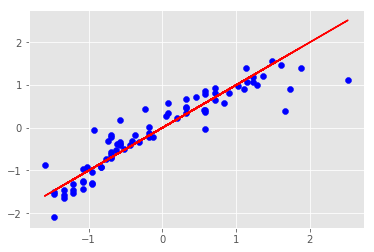

In [12]:
lassocv = linear_model.LassoCV(alphas=None)
lassocv.fit(X_train, Y_train)
lasso.set_params(alpha=lassocv.alpha_)
lasso.fit(X_train, Y_train)
residual = Y_test - lasso.predict(X_test)
print ('RMSE ',np.sqrt(np.mean(residual ** 2)))
plt.scatter(Y_test, lasso.predict(X_test),color = 'Blue')
plt.plot(list(Y_test), list(Y_test), color='Red')
plt.show()

# RIDGE REGRESSION

# Plotting the Ridge Regression

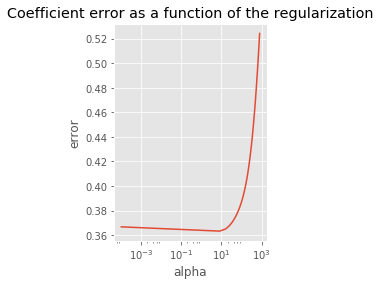

Alphas  cylinders  displacement  horsepower    weight  acceleration  \
0     0.000100  -0.121680      0.273535   -0.029902 -0.756249      0.040296   
1     8.080907  -0.088094      0.089269   -0.072428 -0.581850      0.006473   
2    16.161714  -0.086768      0.014397   -0.095872 -0.491500     -0.007618   
3    24.242521  -0.091041     -0.026272   -0.109592 -0.434759     -0.013982   
4    32.323328  -0.096100     -0.051745   -0.118197 -0.395283     -0.016657   
5    40.404135  -0.100807     -0.069109   -0.123882 -0.365970     -0.017372   
6    48.484942  -0.104914     -0.081626   -0.127783 -0.343188     -0.016978   
7    56.565749  -0.108417     -0.091011   -0.130530 -0.324872     -0.015936   
8    64.646557  -0.111381     -0.098253   -0.132498 -0.309758     -0.014511   
9    72.727364  -0.113883     -0.103965   -0.133919 -0.297021     -0.012865   
10   80.808171  -0.115994     -0.108547   -0.134944 -0.286104     -0.011099   
11   88.888978  -0.117774     -0.112270   -0.135676 -0.276612     -0.009277   
12   96.969785  -0.119275     -0.115327   -0.136184 -0.268259     -0.007443   
13  105.050592  -0.120540     -0.117856   -0.136519 -0.260833     -0.005623   
14  113.131399  -0.121604     -0.119960   -0.136718 -0.254172     -0.003837   
15  121.212206  -0.122495     -0.121718   -0.136808 -0.248150     -0.002095   
16  129.293013  -0.123238     -0.123191   -0.136811 -0.242669     -0.000406   
17  137.373820  -0.123852     -0.124425   -0.136742 -0.237648      0.001226   
18  145.454627  -0.124356     -0.125458   -0.136614 -0.233025      0.002799   
19  153.535434  -0.124762     -0.126321   -0.136436 -0.228746      0.004312   
20  161.616241  -0.125084     -0.127038   -0.136218 -0.224769      0.005765   
21  169.697048  -0.125331     -0.127629   -0.135964 -0.221058      0.007159   
22  177.777856  -0.125512     -0.128112   -0.135680 -0.217582      0.008495   
23  185.858663  -0.125635     -0.128501   -0.135372 -0.214315      0.009775   
24  193.939470  -0.125706     -0.128807   -0.135041 -0.211235      0.011001   
25  202.020277  -0.125731     -0.129041   -0.134693 -0.208324      0.012175   
26  210.101084  -0.125716     -0.129210   -0.134328 -0.205565      0.013298   
27  218.181891  -0.125664     -0.129323   -0.133949 -0.202943      0.014373   
28  226.262698  -0.125579     -0.129386   -0.133559 -0.200448      0.015401   
29  234.343505  -0.125465     -0.129404   -0.133158 -0.198066      0.016386   
..         ...        ...           ...         ...       ...           ...   
70  565.656595  -0.112275     -0.117315   -0.115214 -0.144255      0.034895   
71  573.737402  -0.111909     -0.116943   -0.114802 -0.143449      0.035055   
72  581.818209  -0.111544     -0.116572   -0.114393 -0.142655      0.035207   
73  589.899016  -0.111180     -0.116201   -0.113986 -0.141873      0.035353   
74  597.979823  -0.110817     -0.115831   -0.113581 -0.141103      0.035492   
75  606.060630  -0.110454     -0.115461   -0.113179 -0.140344      0.035624   
76  614.141437  -0.110093     -0.115092   -0.112778 -0.139596      0.035750   
77  622.222244  -0.109733     -0.114724   -0.112380 -0.138858      0.035870   
78  630.303052  -0.109374     -0.114357   -0.111984 -0.138131      0.035984   
79  638.383859  -0.109017     -0.113991   -0.111591 -0.137415      0.036093   
80  646.464666  -0.108660     -0.113626   -0.111199 -0.136707      0.036196   
81  654.545473  -0.108305     -0.113262   -0.110810 -0.136010      0.036294   
82  662.626280  -0.107952     -0.112899   -0.110423 -0.135322      0.036387   
83  670.707087  -0.107599     -0.112538   -0.110039 -0.134642      0.036475   
84  678.787894  -0.107248     -0.112177   -0.109656 -0.133972      0.036558   
85  686.868701  -0.106899     -0.111818   -0.109276 -0.133310      0.036637   
86  694.949508  -0.106551     -0.111460   -0.108898 -0.132657      0.036712   
87  703.030315  -0.106204     -0.111103   -0.108522 -0.132012      0.036782   
88  711.111122  -0.105859     -0.110748   -0.108148 -0.131

In [13]:
alphas =np.linspace(0.0001, 800, 100) 
clf_ridge = linear_model.Ridge()
coefs = []
errors = []
for a in alphas:
    clf_ridge.set_params(alpha=a)
    clf_ridge.fit(X_train, Y_train)
    residual = clf_ridge.predict(X_test) - Y_test
    coefs.append(clf_ridge.coef_)
    rmse = np.sqrt(np.mean(residual ** 2))
    errors.append(rmse)
plt.subplot(122)
ax = plt.gca()
ax.plot(alphas, errors)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('error')
plt.title('Coefficient error as a function of the regularization')
plt.axis('tight')
plt.show()

df1 = pd.DataFrame(alphas)
df2 = pd.DataFrame(coefs)
df = df1.join(df2,how='right',lsuffix='_x')
lst = ['Alphas','cylinders','displacement','horsepower','weight','acceleration','modelyear','origin','carname']
df.columns = lst

df

In [14]:
trace0 = go.Scatter(
    x = df.Alphas,
    y = df.cylinders,
    name = 'Cylinders',
    line = dict(
        color = ('rgb(205, 12, 24)'),
        width = 4)
)
trace1 = go.Scatter(
    x = df.Alphas,
    y = df.displacement,
    name = 'Displacement',
    line = dict(
        color = ('rgb(22, 96, 167)'),
        width = 4)
)
trace2 = go.Scatter(
    x = df.Alphas,
    y = df.horsepower,
    name = 'Horsepower',
    line = dict(
        color = ('rgb(190, 11, 23)'),
        width = 4)
)
trace4 = go.Scatter(
    x =df.Alphas,
    y = df.acceleration,
    name = 'Acceleration',
    line = dict(
        color = ('rgb(112, 96, 109)'),
        width = 4)
)
trace3 = go.Scatter(
    x = df.Alphas,
    y = df.weight,
    name = 'Weight',
    line = dict(
        color = ('rgb(106, 12, 24)'),
        width = 4,
    dash = 'dash')
)
trace5 = go.Scatter(
    x = df.Alphas,
    y = df.modelyear,
    name = 'Model Year',
    line = dict(
        color = ('rgb(1, 96, 167)'),
        width = 4,
     dash = 'dot')
)
trace6 = go.Scatter(
    x = df.Alphas,
    y =df.origin,
    name = 'Origin',
    line = dict(
        color = ('rgb(53, 1, 7)'),
        width = 4,
    dash = 'dash')
)
trace7 = go.Scatter(
    x = df.Alphas,
    y =df.carname,
    name = 'Car Name',
    line = dict(
        color = ('rgb(176, 180, 4)'),
        width = 4,
    dash = 'dash')
)
data = [trace0, trace1, trace2, trace3, trace4, trace5, trace6, trace7]

# Edit the layout
layout = dict(title = 'MPG',
              xaxis = dict(title = 'Alphas'),
              yaxis = dict(title = 'Features'),
              )

fig = dict(data=data, layout=layout)
iplot(fig, filename = 'Ridge_graph')

# RidgeCV

In [15]:
ridgecv = linear_model.RidgeCV(alphas=alphas, scoring = 'neg_mean_squared_error',normalize= True)
ridgecv.fit(X_train, Y_train)
ridgecv.alpha_

0.0001

In [16]:
prediction = ridgecv.predict(X_test)
residual = prediction - Y_test

# Plotting above alpha

Coefficients [-0.12135718  0.27231149 -0.03010491 -0.75526494  0.04009409  0.35813397
  0.11260594  0.06336446]
Intercept -0.00505189953778


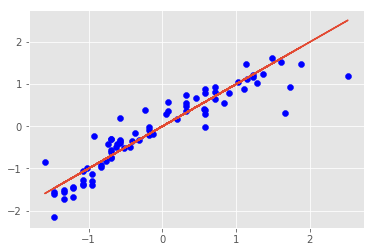

In [17]:
print ('Coefficients',ridgecv.coef_)
print ('Intercept',ridgecv.intercept_)
plt.scatter(Y_test,prediction,color = 'Blue')
plt.plot(Y_test,Y_test)
plt.show()

# Finding the RMSE value

In [18]:
np.sqrt(np.mean(residual ** 2))

0.36668091158719235

# Box Plot of Residual

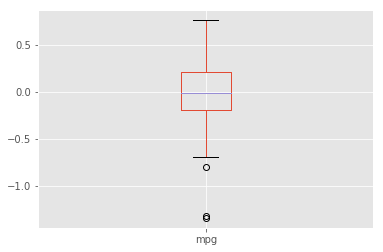

In [19]:
residual.plot(kind = 'box')
plt.show()

# ORDINARY LEAST SQUARE

# Plotting OLS 

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.807
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     428.9
Date:                Sun, 02 Apr 2017   Prob (F-statistic):          1.32e-109
Time:                        11:27:01   Log-Likelihood:                -188.00
No. Observations:                 312   AIC:                             384.0
Df Residuals:                     308   BIC:                             399.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0030      0.025     -0.119      0.9

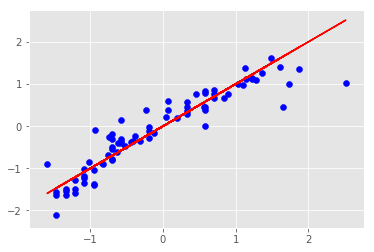

In [20]:
model_scaled = ols.ols(formula='mpg ~ modelyear + weight + origin', data=train).fit()
print (model_scaled.summary()) 
res = model_scaled.predict(X_test)
residual = res - Y_test
plt.plot(list(Y_test), list(Y_test), color='Red')
plt.scatter(list(Y_test), list(res), color='Blue')
plt.show()

# Finding RMSE

In [21]:
np.sqrt(np.mean(residual ** 2))

0.36006697748632899

# Box Plot of residual

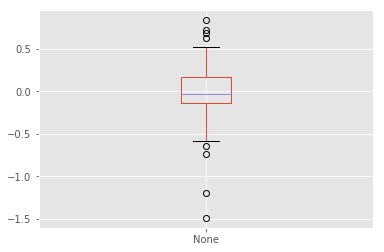

In [22]:
residual.plot(kind = 'box')
plt.show()

# Histogram of residuals

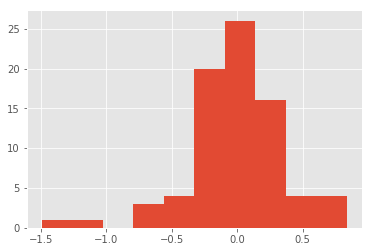

In [23]:
plt.hist(residual)
plt.show()